In [8]:
import findspark
findspark.init()

In [9]:
import pyspark

In [10]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

In [11]:
sc =SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at C:\Users\AW\AppData\Local\Temp\ipykernel_24304\3019613948.py:1 

In [12]:
spark = SparkSession(sc)

In [14]:
#1. Create a DataFrame from CSV file. # Load the Dataframe 
fifa_df = spark.read.csv("data/Fifa2018_dataset.csv", header=True, inferSchema=True)

In [15]:
#2. Check the schema of columns 
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [16]:
# Show the first 3 observations
for row in fifa_df.head(2):
    print(row)
    print('\n')
fifa_df.show(3)

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

In [17]:
# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

There are 17981 rows in the fifa_df DataFrame


In [18]:
#3. Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_table')

In [19]:
# 4.
# Construct the "query"
query = '''SELECT Age FROM fifa_table WHERE Nationality == "Germany"'''
# Apply the SQL "query"
fifa_germany_age = spark.sql(query)

In [20]:
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [21]:
# Generate basic statistics
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



In [22]:
#5. 
# Convert fifa_germany_age to fifa_germany_age_pandas DataFrame
fifa_germany_age_pandas = fifa_germany_age.toPandas()

In [23]:
import matplotlib.pyplot as plt

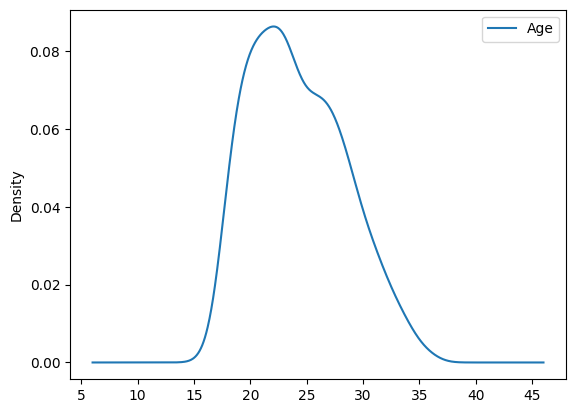

In [24]:
# Plot the 'Age' density of Germany Players
fifa_germany_age_pandas.plot(kind='density')
plt.show()

In [25]:
#6. 
fifa_df.groupBy("Age").count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
| 29| 1121|
+---+-----+
only showing top 20 rows



In [26]:
fifa_df.groupBy("Nationality").avg("Age").show()

+--------------------+------------------+
|         Nationality|          avg(Age)|
+--------------------+------------------+
|                Chad|              25.0|
|              Russia| 25.23202614379085|
|            Paraguay| 26.10144927536232|
|             Senegal|25.046511627906977|
|              Sweden|25.119565217391305|
|             Eritrea|              32.0|
|         Philippines|25.666666666666668|
|                Fiji|              29.0|
|              Turkey|25.127147766323024|
|                Iraq|              26.0|
|             Germany| 24.20263157894737|
|      St Kitts Nevis|26.666666666666668|
|             Comoros| 27.11111111111111|
|         Ivory Coast| 24.10891089108911|
|              France|24.634969325153374|
|              Greece|24.418367346938776|
|              Kosovo|           23.9375|
|Central African Rep.|             26.75|
|            DR Congo| 24.75862068965517|
|          Montserrat|              24.5|
+--------------------+------------

In [27]:
#7. 
from pyspark.sql import functions as F
fifa_df.groupBy("Nationality").agg(F.min("Age"), 
    F.max("Age"), 
    F.min("Strength"), 
    F.max("Strength")).show()

+------------------+--------+--------+-------------+-------------+
|       Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+------------------+--------+--------+-------------+-------------+
|       Afghanistan|      19|      27|           40|           58|
|           Albania|      18|      33|           32|           79|
|           Algeria|      17|      34|           39|           90|
|            Angola|      20|      34|           56|           87|
| Antigua & Barbuda|      20|      26|           47|           67|
|         Argentina|      16|      39|           28|           92|
|           Armenia|      18|      32|           49|           75|
|         Australia|      17|      37|           28|           90|
|           Austria|      17|      36|           20|           93|
|        Azerbaijan|      18|      31|           64|           84|
|          Barbados|      30|      30|           71|           71|
|           Belarus|      27|      36|           43|          

In [28]:
#8. 
fifa_df.select("Club").distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
|       SC Heerenveen|
+--------------------+
only showing top 20 rows



In [29]:
query = '''SELECT DISTINCT Club FROM fifa_table'''
# Apply the SQL "query"
fifa_clubs = spark.sql(query)
fifa_clubs.show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
|       SC Heerenveen|
+--------------------+
only showing top 20 rows



In [30]:
#9.
fifa_df_desc = fifa_df.orderBy(fifa_df["Age"].desc())

In [31]:
fifa_df_desc.select("Name", "Age", "Strength").show(3)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
+-------------+---+--------+
only showing top 3 rows



In [32]:
#10.
people_with_Cristiano = fifa_df.where(fifa_df["Name"].contains("Cristiano"))
people_with_Cristiano.count()

3

In [33]:
people_with_Cristiano.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [34]:
query = '''SELECT * FROM fifa_table WHERE Name like "%Cristiano%"'''
people_with_Cristiano_2 = spark.sql(query)
people_with_Cristiano_2.count()

3

In [35]:
people_with_Cristiano_2.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

